<a href="https://colab.research.google.com/github/allirezamaleki/Heart-Disease/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction

In [46]:
# import libraries

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [67]:
# import dataset
dataset = "heart-2.csv"
df = pd.read_csv(dataset)
df.head() # show top 5 column

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [69]:
# check if any column is null or not
df.isnull() 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [70]:
# show sum of the null cells in every column
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [71]:
# Replace "Zero" values with NaN
columns = ['trtbps', 'chol', 'thalachh', 'oldpeak']
df_copy = df.copy(deep = True)  # create a copy of original dataframe
df_copy[columns] = df_copy[columns].replace([0, '0'], np.nan)

# NaN or Null values are shown after this data cleaning process
df_copy.isnull().sum()

age          0
sex          0
cp           0
trtbps       0
chol         0
fbs          0
restecg      0
thalachh     0
exng         0
oldpeak     99
slp          0
caa          0
thall        0
output       0
dtype: int64

In [72]:
# Now fill this NaN values with median
# Since "oldpeak" is the only column with Nan values, changes will applied on this column
df_copy["oldpeak"].fillna(df_copy["oldpeak"].mean(), inplace = True)

1    165
0    138
Name: output, dtype: int64


Text(0.5, 1.0, 'values count in OUTPUT column')

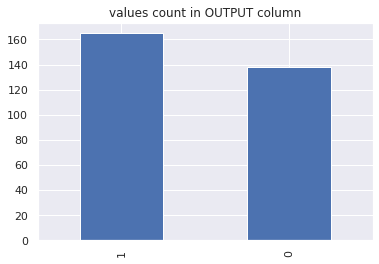

In [75]:
print(df["output"].value_counts())

df["output"].value_counts().plot(kind = "bar")
plt.title("values count in OUTPUT column")

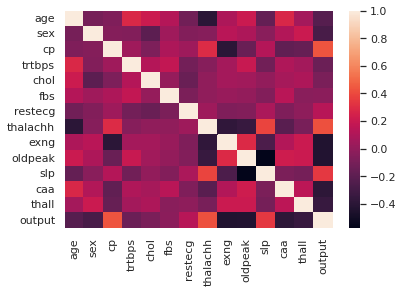

In [76]:
# Plot correlation between each column to another columns and itself
sns.heatmap(df.corr());

In [59]:
# df["oldpeak"] = df["oldpeak"].round(0)

In [77]:
x = df.drop('output', axis = 1)
y = df['output']

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


### Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(x_train, y_train)

DecisionTreeClassifier()

In [96]:
y_pred = DecisionTree.predict(x_test)
print(round(accuracy_score(y_test, y_pred)*100, 2), "%")

77.05 %


In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75        27
           1       0.81      0.76      0.79        34

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



Text(30.5, 0.5, 'Actual label')

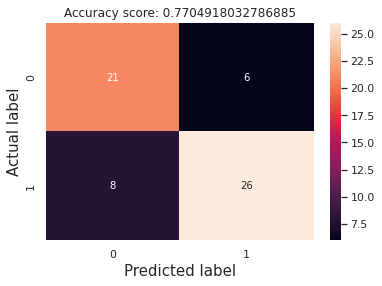

In [101]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.title("Accuracy score: {0}".format(accuracy_score(y_test, y_pred)))
plt.xlabel("Predicted label", size = 15)
plt.ylabel("Actual label", size = 15)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'ROC-curve (Decision Tree Classifier)')

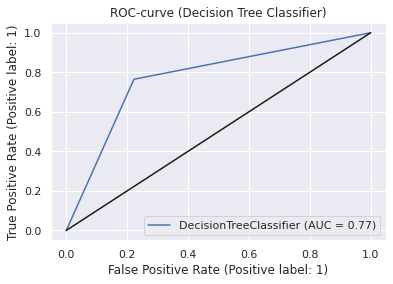

In [102]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(DecisionTree, x_test, y_test)
plt.plot([0,1], [0,1], c = 'k')
plt.title('ROC-curve (Decision Tree Classifier)')

## Random Forest Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train, y_train)

RandomForestClassifier()

In [106]:
y_pred = RF.predict(x_test)
print(round(accuracy_score(y_test, y_pred)*100, 2), "%")

81.97 %


In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



Text(30.5, 0.5, 'Actual label')

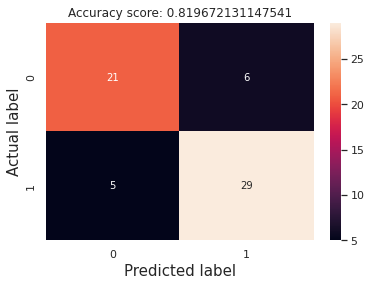

In [108]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.title("Accuracy score: {0}".format(accuracy_score(y_test, y_pred)))
plt.xlabel("Predicted label", size = 15)
plt.ylabel("Actual label", size = 15)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'ROC-curve (Random Forest Classifier)')

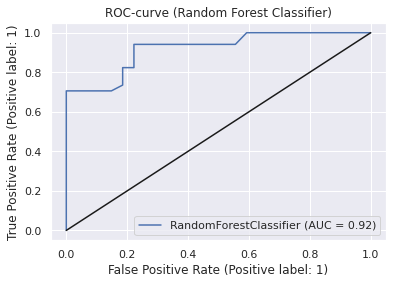

In [111]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(RF, x_test, y_test)
plt.plot([0,1], [0,1], c = 'k')
plt.title('ROC-curve (Random Forest Classifier)')